### Website Traffic

The purpose of this notebook is to find the determinants of website traffic. The notebook was divided into two parts:

1.   Data exploration
2. Model creation

In [ ]:
#Libraries
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import HTML, display

#Google collab libraries
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

##1. Data exploration

In [ ]:
# Google collab settings
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#Import data from Google Drive 
link= 'https://drive.google.com/open?id=1-AEdzua4h53AUzvNy8CxmElLHly4lJaG'
fluff, id = link.split('=')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Dataset.xlxs')  
visits = pd.read_excel('Dataset.xlxs',sheet_name='vistit_1')
spots = pd.read_excel('Dataset.xlxs',sheet_name='spots')

In [ ]:
#new column creation in both datasets
visits['Time'] = visits['Data'].astype(str) + ' ' + visits['godzina'].map(str)
spots['Time'] = spots['Date'].astype(str) + ' ' + spots['Hour'].map(str)

In [ ]:
#merge two datasets
data = visits.set_index('Time').join(spots.set_index('Time'))

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


AttributeError: ignored

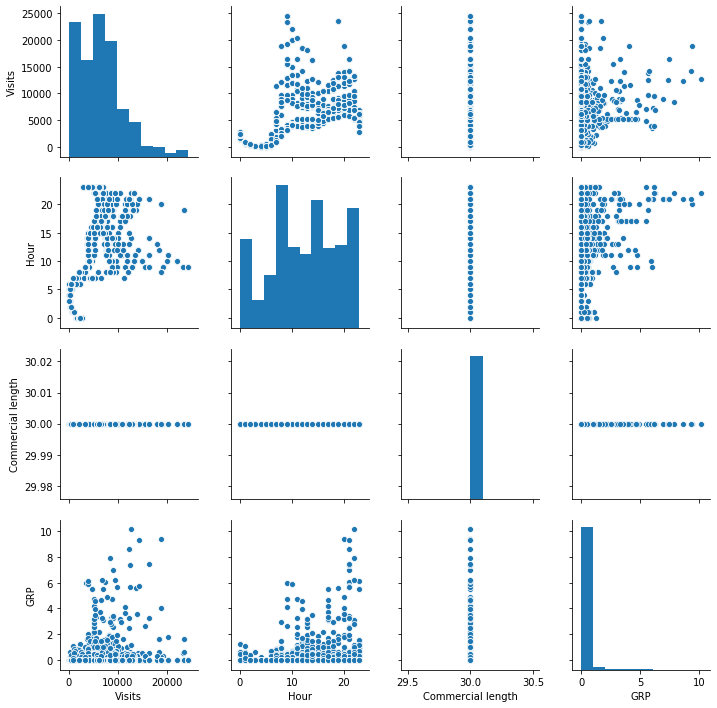

In [ ]:
#matrix chart for corelation
sns.pairplot(data.drop(['godzina'], axis=1))
sns.plt.show

In [ ]:
#number of categories in each column
data.select_dtypes('object').apply(pd.Series.nunique, axis = 0).sort_values(ascending=False)

Title                                        893
AGB Channel                                   59
Campaign Channel                               7
Position Type in the block of commercials      3
BreakType (Block type)                         3
Timeband                                       3
dtype: int64

<function matplotlib.pyplot.show>

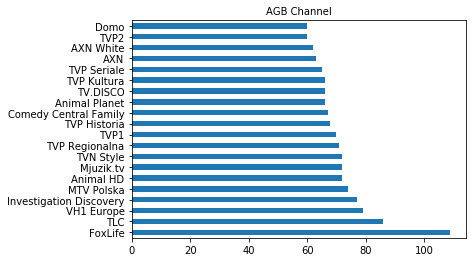

In [ ]:
#most frequent categories in AGB Channel
data['AGB Channel'].value_counts().nlargest(20).plot(kind='barh')
plt.title('AGB Channel',fontsize=10)
plt.show

<function matplotlib.pyplot.show>

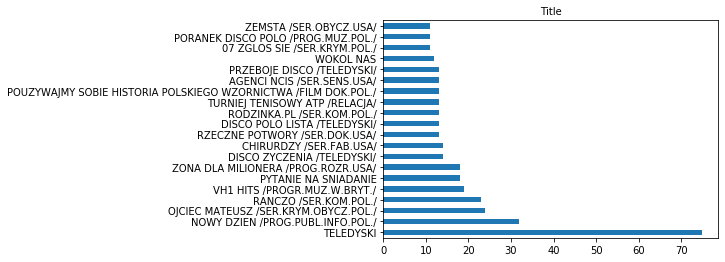

In [ ]:
#most frequent categories in Title
data['Title'].value_counts().nlargest(20).plot(kind='barh')
plt.title('Title',fontsize=10)
plt.show

(array([735548., 735550., 735552., 735554., 735556., 735558., 735560.]),
 <a list of 7 Text xticklabel objects>)

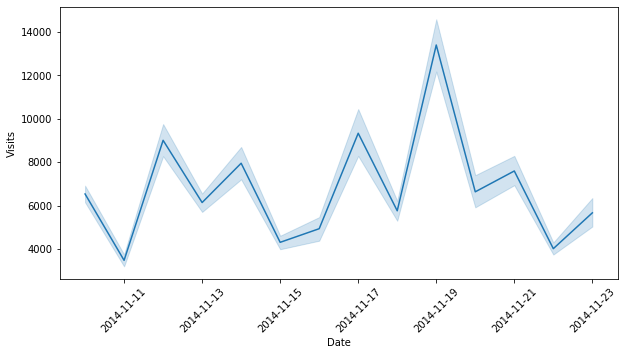

In [ ]:
# dependent variable visualisation
plt.figure(figsize=(10,5))
ax = sns.lineplot(x="Date", y="Visits", data=data)
plt.xticks(rotation=45)

In [ ]:
#final data preparation
data_var = data.drop(['Data','godzina','Date','Commercial length','Timeband','AGB Channel','Title'],axis=1)
data_prepared = pd.get_dummies(data_var,columns=['Campaign Channel','BreakType (Block type)','Position Type in the block of commercials'])
data_prepared = data_prepared.dropna()
Y = data_prepared['Visits']
X = data_prepared.drop(['Visits'],axis=1)
X['Hour^2']=np.power(X['Hour'],2)

In [ ]:
#linaer model creation (OLS)
result = sm.OLS(Y,X).fit()
summary = result.summary()
HTML(summary.as_html())

In [ ]:
#Breusch Godfrey Lagrange Multiplier tests for residual autocorrelation
sm.stats.diagnostic.acorr_breusch_godfrey(result)

(1969.8457684232783, 0.0, 692.288167816612, 0.0)

In [ ]:
#linaer model creation (GLS)
result = sm.GLS(Y,X).fit()
summary1 = result.summary()
HTML(summary1.as_html())

In [ ]:
#data preparation to improve the model
data_prepared2 = data_var.drop(['Campaign Channel','BreakType (Block type)','Position Type in the block of commercials'],axis=1)
data_prepared2 = data_prepared2.dropna()
y = data_prepared2['Visits']
x = data_prepared2.drop(['Visits'],axis=1)
x['Hour^2']=np.power(X['Hour'],2)

In [ ]:
#linaer model creation (GLS) with less data
result1 = sm.GLS(y,x).fit()
summary2 = result1.summary()
HTML(summary2.as_html())